In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 히스토그램 균일화 (Histogram Equalization)
    이미지의 히스토그램이 특정영역에 너무 집중되어 있으면 Contrast가 낮아 좋은 이미지라고 할 수 없다. 여기서 Contrast는 밝은 부분과 어두운 부분의 차이를 의미한다. 예를들어 이미지 안의 대부분의 픽셀들의 intensity가 비슷하다면, 어떤 물체가 있는지 쉽게 알 수가 없다. 이럴 경우 Contrast가 낮다고 한다. 반대로 이것이 높다면, 은 픽셀들 간의 intensity 차이가 많이 나, 해가 비치는 부분과 그림자 진 부분을 쉽게 구분할 수 있는 것처럼 물체의 모양이나 윤곽을 한 눈에 알아볼 수 있을 것이다. 따라서 이미지 intensity가 한 곳에 몰려 낮아진 Contrast를 균일화하여 Contrast를 높이는 과정이 히스토그램 균일화 과정이다.

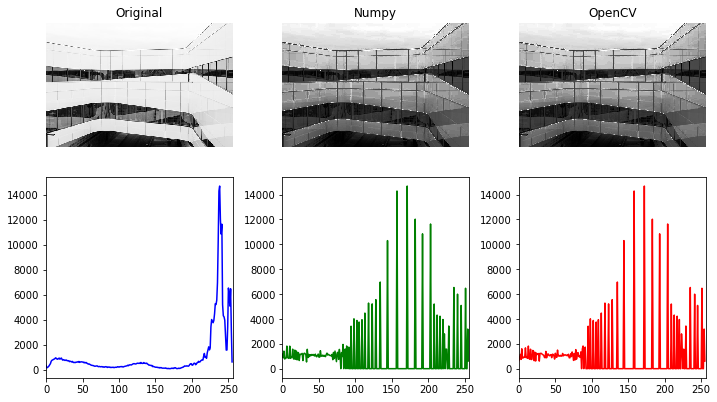

In [2]:
img = cv2.imread('jonas-aberg-DmgwxkcdFCM-unsplash.jpg')

# numpy 함수를 이용한 equalization
hist, bins = np.histogram(img.ravel(), 256, [0, 256])
cdf = np.cumsum(hist)
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf[img]

#openCV 함수를 이용한 equalization
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img3 = cv2.equalizeHist(img_gray)
img3_bgr = cv2.cvtColor(img3, cv2.COLOR_GRAY2RGB)

hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

cv2.imshow('img1', img)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

titles = ["Original", "Numpy", "OpenCV"]
images = [img, img2, img3_bgr]
hist = [hist1, hist2, hist3]

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')
    
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    plt.subplot(2, 3, i+4)
    plt.plot(hist[i], color=col)
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

    Numpy 함수를 이용하여 이미지의 각 픽셀의 누적분포함수(CDF)값을 구하고, 이를 Histogram equalization 공식에 대입하여 0-255 사이의 값으로 변환할 수 있다. 이렇게 새롭게 구해진 값으로 이미지를 표현하면 이전 이미지보다 Contrast가 높아져 주변의 물체 및 윤곽을 더 쉽게 구별할 수 있다.
    
    먼저 앞서 배웠던 numpy의 histogram함수를 이용해 이미지 히스토그램을 구한 후, cumsum 함수를 이용해 누적분포함수(CDF)를 구한다. 해당 CDF에서 0인 부분은 mask 처리하여 계산에서 제외한 뒤, histogram equalization 공식을 이용해 계산한다. 그 후, mask 처리했던 부분을 다시 0으로 변환시킨다. 원래 이미지에서 변경된 히스토그램을 적용한 새로운 이미지 img2를 생성한다.
    
    (Numpy의 masked array는 대상에서 비정상적인 대상을 제거할 때 사용되는 모듈이다. 데이터에 유효하지 않은 데이터가 있거나 불완전한 데이터가 있으면 numpy.ma 모듈(https://numpy.org/doc/stable/reference/maskedarray.generic.html#module-numpy.ma)을 통해 masking된 배열을 만들어 제외시킬 수 있다.)

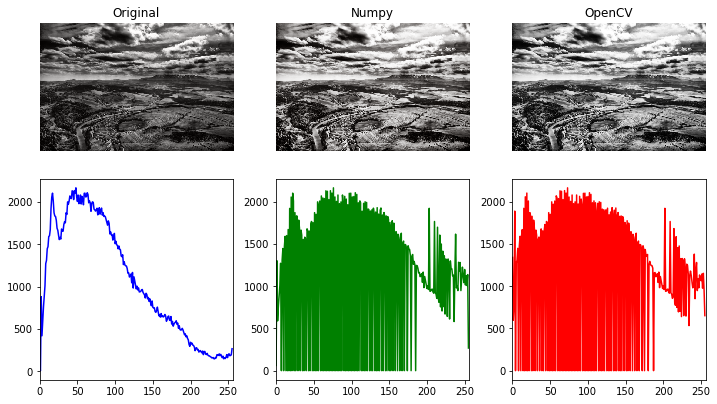

In [3]:
img = cv2.imread('janusz-maniak-eP-LmfMwxpc-unsplash.jpg')

# numpy 함수를 이용한 equalization
hist, bins = np.histogram(img.flatten(), 256, [0, 256])
cdf = np.cumsum(hist)
cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min()) * 255 / (cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')
img2 = cdf[img]

#openCV 함수를 이용한 equalization
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img3 = cv2.equalizeHist(img_gray)
img3_bgr = cv2.cvtColor(img3, cv2.COLOR_GRAY2RGB)

hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

cv2.imshow('img1', img)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

titles = ["Original", "Numpy", "OpenCV"]
images = [img, img2, img3_bgr]
hist = [hist1, hist2, hist3]

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i])
    plt.axis('off')
    
color = ('b', 'g', 'r')
for i, col in enumerate(color):
    plt.subplot(2, 3, i+4)
    plt.plot(hist[i], color=col)
    plt.xlim([0, 256])

plt.tight_layout()
plt.show()

    openCV에는 위에서 numpy를 이용하여 구현한 것과 동일한 결과를 반환하는 equalizeHist 함수를 제공한다.
    
## cv2.equalizeHist(src [, dst]) → dst
    src에 Grayscale 이미지를 입력하면 src의 히스토그램을 균일화 하는 함수이다. 다음과 같은 알고리즘을 통해 입력받은 이미지의 히스토그램을 균일화 한다.
    1. 먼저 원본 이미지의 히스토그램 H를 계산한다.
    2. 히스토그램을 정규화하여 히스토그램 bin들의 합이 255가 되게한다.
    3. 히스토그램의 적분값 H^을 계산한다.
    4. 적분값을 look-up 테이블로 사용하여 이미지로 변환한다.
    이 알고리즘은 brightness를 정규화하고 이미지의 Contrast를 증가시킨다.

---
# CLAHE (Contrast Limited Adaptive Histogram Equalization)
    지금까지 이미지 히스토그램 균일화 과정은 이미지의 전체적인 부분에 적용해왔지만, 일반적인 이미지는 밝은 부분과 어두운 부분이 섞여있기 때문에 이미지 전체에 적용하는 것은 유용하지 않을 수 있다. 밝은 부분과 어두운 부분이 섞여있는 이미지에 히스토그램 균일화를 일괄적으로 적용시키면 밝기가 밝아지면서 어두운 부분의 물체의 구분은 잘 될 수 있으나 밝은 부분은 오히려 너무 밝아져 원래의 형체를 알아보기 힘들 수도 있다. 
    
    이때 adaptive histogram equalization, 지역적으로 히스토그램을 균일화시키는 방법을 사용한다. 대표적으로 CLAHE의 경우에는 이미지를 일정한 크기를 가진 작은 블록으로 구분하고, 블록별로 히스토그램 균일화를 적용하는 방식이다. 이때, 이미지에 극단적으로 어둡거나 밝은 부분 혹은 노이즈가 있는 경우에는 타일 단위로 균일화를 적용하면 노이즈가 커질 수 있으므로, Contrast limit 임계값을 적용하여 이 값을 넘어가는 경우 그 영역은 다른 영역에 균일하게 배분하여 적용시킨다. 이렇게 타일별로 균일화가 모두 마무리되면, 타일간 경계부분은 bilinear interpoliation을 적용해 매끈하게 만들어준다.

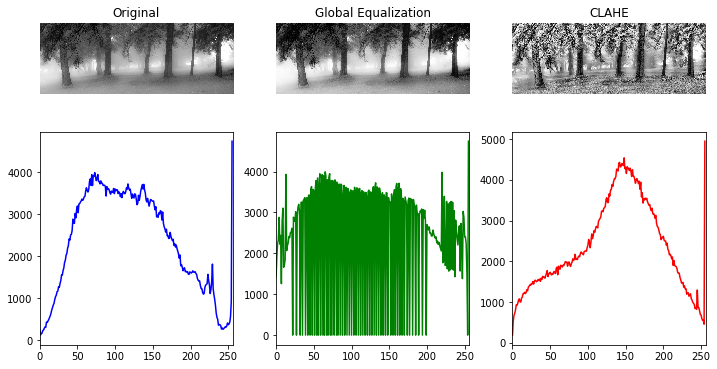

In [6]:
img = cv2.imread('fog-3117975_1280.jpg', cv2.IMREAD_GRAYSCALE)

# Histogram Equalization
img2 = cv2.equalizeHist(img)

# CLAHE로 균일화
clahe = cv2.createCLAHE(clipLimit=10.0, tileGridSize=(20, 20))
img3 = clahe.apply(img)

hist1 = cv2.calcHist([img], [0], None, [256], [0, 256])
hist2 = cv2.calcHist([img2], [0], None, [256], [0, 256])
hist3 = cv2.calcHist([img3], [0], None, [256], [0, 256])

cv2.imshow('img1', img)
cv2.imshow('img2', img2)
cv2.imshow('img3', img3)
cv2.waitKey(0)
cv2.destroyAllWindows()

titles = ["Original", "Global Equalization", "CLAHE"]
images = [img, img2, img3]
hist = [hist1, hist2, hist3]

plt.figure(figsize=(10, 6))
for i in range(3):
    plt.subplot(2, 3, i+1)
    plt.title(titles[i])
    plt.imshow(images[i], cmap="gray")
    plt.axis('off')
    
color = ("b", "g", "r")
for i, col in enumerate(color):
    plt.subplot(2, 3, i+4)
    plt.plot(hist[i], color=col)
    plt.xlim([0, 256])
    
plt.tight_layout()
plt.show()

## cv2.createCLAHE([, clipLimit [, tileGridSize]]) → retval
    createCLAHE 함수는 CLAHE 객체를 만들고 초기화하는 함수이다. clipLimit, tileGridSize를 선택적으로 인자를 받으며, default로 각각 40.0, (8, 8)의 크기를 가진다. 여기서 climLimit 인자는 Contrast limiting을 위한 임계값을 지정하는 인자이고, tileGridSize는 히스토그램 균일화를 위한 한 칸의 크기를 지정하는 인자로, 이 인자에 의해서 입력받을 이미지는 직사각형 타일 모양으로 동일하게 나뉘어진다. tileGridSize는 행과 열의 tile 갯수를 의미한다.
    
## CLAHE.apply(src[, dst]) → dst
    apply는 CLAHE 객체의 메소드로, src에 CV_8UC1 혹은 CV_16UC1와 같은 데이터 타입을 가진 Grayscale 이미지를 인자로 넣어주면 CLAHE를 이용하여 이미지의 히스토그램을 균일화한다.